In [81]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc,recall_score,precision_score

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import math

In [82]:
df = pd.read_csv(r"oof_set.csv",index_col=0)
test_df = pd.read_csv(r"D:\source\repos\Kaggle_Tabular_Playground_Series-ML\Jan-2023-S2\data\test.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_v,ever_married_v,work_type_v,Residence_type_v,smoking_status_v,predicted_XGB_stroke,predicted_LGBM_stroke,predicted_CAT_stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0,1,1,4,1,1,0.016235,0.027383,0.008776
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0,1,1,4,0,0,0.017183,0.029813,0.006806
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0,0,1,4,0,4,0.020730,0.030433,0.012712
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0,1,1,4,1,1,0.041567,0.037518,0.040121
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0,0,0,4,0,1,0.011528,0.019258,0.006986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0,0,0,2,1,1,0.010425,0.018343,0.000822
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0,0,1,4,1,1,0.040941,0.047361,0.028171
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0,0,1,1,1,1,0.128097,0.087940,0.152647
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0,1,1,4,0,4,0.017538,0.025522,0.006637


In [83]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_v', 'ever_married_v', 'work_type_v',
       'Residence_type_v', 'smoking_status_v', 'predicted_XGB_stroke',
       'predicted_LGBM_stroke', 'predicted_CAT_stroke'],
      dtype='object')

In [84]:
def roc_auc_score(y_valid, preds):
    fpr, tpr, _ = roc_curve(y_valid, preds)
    roc_auc = auc(fpr, tpr)
    return roc_auc

In [85]:
combos = []

for x in range(100):
    for y in range(100):
        if x + y < 100:
            z = 100 - x - y
            combos.append([x, y, z])
combos = np.array(combos) * ([[0.01]*3]*len(combos))
len(combos)

5050

In [86]:
coefficients = combos
best_score = 0
best_coefficients_index = 0

for index, (a, b, c) in tqdm(enumerate(coefficients)):
    score = roc_auc_score(df["stroke"], (a * df['predicted_XGB_stroke']) + (b * df['predicted_LGBM_stroke']) + (c * df['predicted_CAT_stroke']))
    if score > best_score:
        best_score = score
        best_coefficients_index = index

5050it [00:09, 546.73it/s]


In [87]:
best_coefficients_index

771

In [88]:
best_score


0.9153676209226563

In [89]:
combos[best_coefficients_index]

array([0.07, 0.92, 0.01])

In [90]:
combos

array([[0.  , 0.  , 1.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.02, 0.98],
       ...,
       [0.98, 0.  , 0.02],
       [0.98, 0.01, 0.01],
       [0.99, 0.  , 0.01]])

In [91]:
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_v', 'ever_married_v', 'work_type_v', 'Residence_type_v', 'smoking_status_v']
labels = ['stroke']

In [92]:
columns_to_vectorize = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for vector_target in columns_to_vectorize:
    vectorizer = CountVectorizer()
    vectorizer.fit_transform(df[vector_target])
    df[f'{vector_target}_v'] = vectorizer.transform(df[vector_target]).toarray().argmax(axis=1)[:,None]
    vectorizer.fit_transform(test_df[vector_target])
    test_df[f'{vector_target}_v'] = vectorizer.transform(test_df[vector_target]).toarray().argmax(axis=1)[:,None]

In [93]:
#https://github.com/dhaitz/mplcyberpunk
%pip install mplcyberpunk
import mplcyberpunk

In [94]:
from itertools import islice, cycle

plt.style.use("cyberpunk")

def add_secondary_plot(df, column, target_column, ax, n_bins, color=3, show_yticks=False, marker="."):
    secondary_ax = ax.twinx()
    bins = pd.cut(df[column], bins=n_bins)
    bins = pd.IntervalIndex(bins)
    bins = (bins.left + bins.right) / 2
    target = df.groupby(bins)[target_column].mean()
    target.plot(
        ax=secondary_ax, linestyle='',
        marker=marker, color=color, label=f"Mean '{target_column}'"
    )
    secondary_ax.grid(visible=False)
    
    if not show_yticks:
        secondary_ax.get_yaxis().set_ticks([])
        
    return secondary_ax

def render_feature_distros(train_df, test_df, features=[], labels=[], n_bins=50, n_cols=4, pad=2, h_pad=4, w_pad=None):
    histplot_hyperparams = {
        'kde':True,
        'alpha':0.4,
        'stat':'percent',
        'bins':n_bins
    }
    markers = ['.', '+', 'x', '1', '2']
    
    n_rows = math.ceil(len(features) / n_cols)
    cell_with_dim = 4
    cell_height_dim = 3
    
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * cell_with_dim, n_rows * cell_height_dim))
    plt.tight_layout(pad=pad, h_pad=h_pad, w_pad=w_pad, rect=None)
    
    # delete exess subplots
    for a in ax[n_rows - 1, int(((n_rows - (len(features) / n_cols)) * n_cols*-1)):]:
        a.axis('off')
        
    leg_handles = []
    leg_labels = []
    
    axs = []

    for i, feature in enumerate(features):
        row = math.ceil(i / n_cols) - 1
        col = (i % n_cols)
        
        color_cycle = islice(mplcyberpunk.cyberpunk_stylesheets['cyberpunk']['axes.prop_cycle'], 0, None)
        
        sns.histplot(train_df[feature], label='Train X', ax=ax[row, col], color=next(color_cycle)['color'], **histplot_hyperparams)
        sns.histplot(test_df[feature], label='Test X', ax=ax[row, col],color=next(color_cycle)['color'], **histplot_hyperparams)
        ax[row, col].set_title(f'{feature} Distribution')
        mplcyberpunk.make_lines_glow(ax[row, col])
        axs.append(ax[row, col].get_legend_handles_labels())

        for j, label in enumerate(labels):
            sub_ax = add_secondary_plot(train_df, feature, label, ax[row, col], n_bins, color=next(color_cycle)['color'], marker=markers[j])
            axs.append(sub_ax.get_legend_handles_labels())
        
    for axis in axs:
        if axis[1][0] not in leg_labels:
            leg_labels.extend(axis[1])
            leg_handles.extend(axis[0])
        
    fig.legend(leg_handles, leg_labels, loc='upper center', bbox_to_anchor=(0.5, 1.04), fontsize=14, ncol=len(features) + 2)

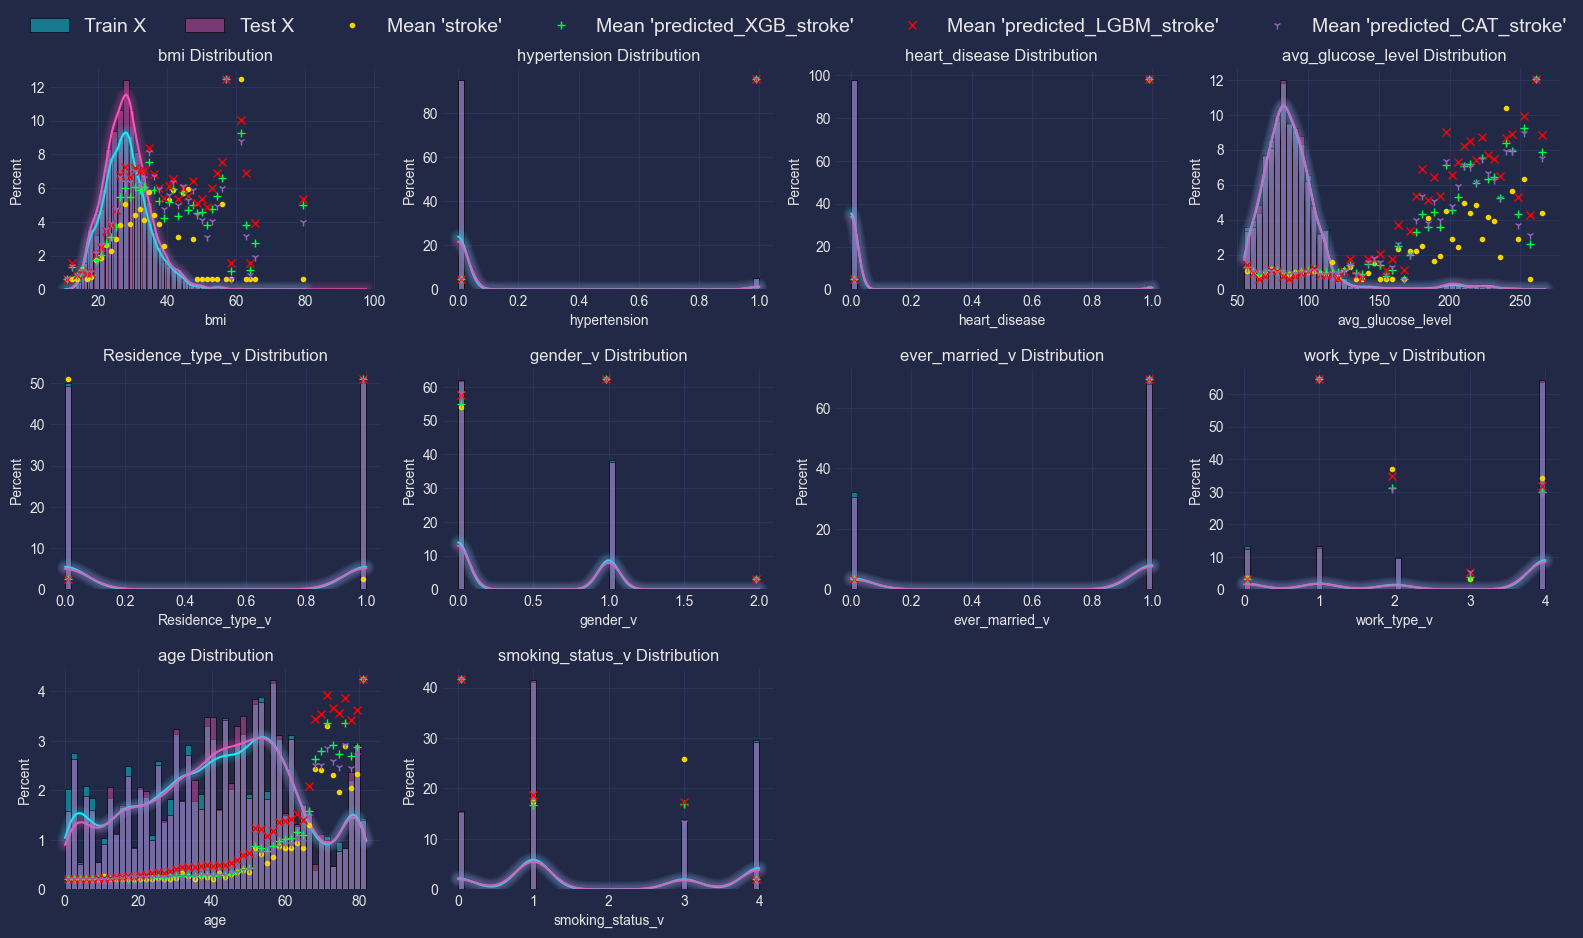

In [95]:
render_feature_distros(train_df=df, test_df=test_df, features=features, labels=['stroke', 'predicted_XGB_stroke', 'predicted_LGBM_stroke', 'predicted_CAT_stroke'])